In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle=True, stratify=y)

In [45]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

In [24]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
scores_clf1 = cross_val_score(clf1, X_train, y_train, cv=kfold, scoring='accuracy')
scores_clf2 = cross_val_score(clf2, X_train, y_train, cv=kfold, scoring='accuracy')

In [54]:
scores_clf1

array([1.        , 0.95833333, 0.95833333, 0.95833333, 1.        ])

In [55]:
print("Mean for clf1:", np.mean(scores_clf1))

Mean for clf1: 0.975


In [56]:
print("Mean for clf2:", np.mean(scores_clf2))

Mean for clf2: 0.95


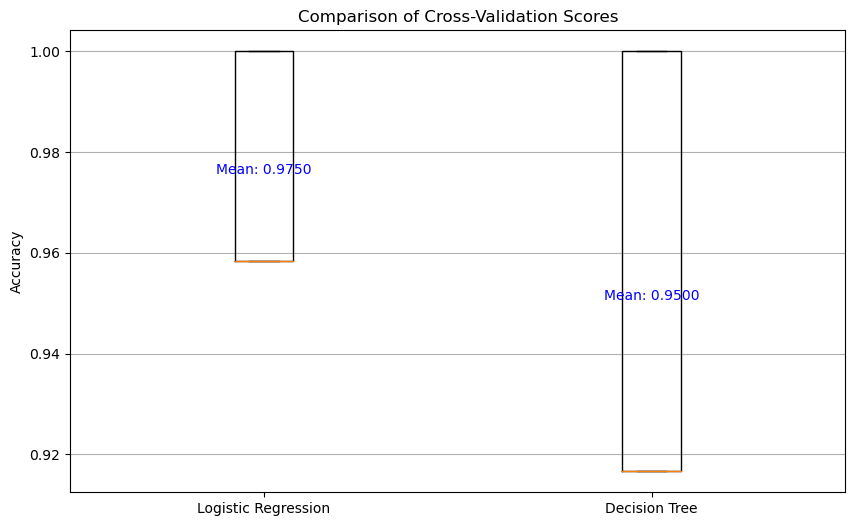

In [57]:
# Visualization
labels = ['Logistic Regression', 'Decision Tree']
data = [scores_clf1, scores_clf2]

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 3), labels)
plt.grid(axis='y')

# Calculate and display mean scores
mean_scores = [np.mean(scores_clf1), np.mean(scores_clf2)]
for i, mean in enumerate(mean_scores, 1):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()


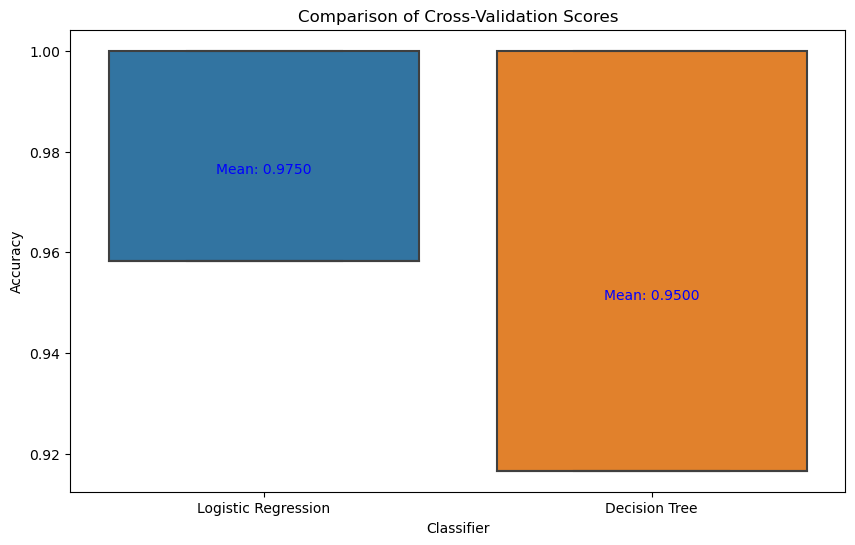

In [58]:
import seaborn as sns
import pandas as pd

# Preparing data in DataFrame format for Seaborn
df1 = pd.DataFrame({'Score': scores_clf1, 'Classifier': 'Logistic Regression'})
df2 = pd.DataFrame({'Score': scores_clf2, 'Classifier': 'Decision Tree'})
df = pd.concat([df1, df2])

# Visualization using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classifier', y='Score', data=df)

# Adding title and y-label
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')

# Display mean scores
for i, mean in enumerate(mean_scores):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()
